In [40]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [41]:
from fastai.tabular import *


In [42]:

path = Path("")
df = pd.read_csv(path/'data_final.csv')

In [43]:
df.head().T

,0,1,2,3,4
Date,8/8/2008,8/11/2008,8/12/2008,8/13/2008,8/14/2008
DJI,11734.3,11782.4,11642.5,11533,11615.9
S&P500,1296.32,1305.32,1289.59,1285.83,1292.93
NASDAQ,2414.1,2439.95,2430.61,2428.62,2453.67
Russell_3000,756.344,762.564,753.948,752.935,757.509
Willshire_5000,13197.1,13308,13163.6,13145.5,13228.2
ma7,NaN,NaN,NaN,NaN,NaN
ma21,NaN,NaN,NaN,NaN,NaN
26ema,11734.3,11759.3,11717.3,11665.8,11654.2
12ema,11734.3,11760.3,11714.3,11657.1,11645.9


In [44]:
n = len(df); n

1989

In [45]:
train_df = df.iloc[:1500,:]
valid_df = df.iloc[1500:,:]


In [46]:
train_df["is_valid"]=0

C:\Users\Taru Tak\Anaconda3\envs\fastai_v1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
valid_df["is_valid"]=1

C:\Users\Taru Tak\Anaconda3\envs\fastai_v1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
df_final=train_df.append(valid_df)

In [49]:
len(train_df),len(valid_df)

(1500, 489)

In [50]:
procs=[FillMissing, Normalize]

In [57]:
cont_vars = [ 'S&P500', 'NASDAQ', 'Russell_3000', 'Willshire_5000',
       'ma7', 'ma21', '26ema', '12ema', 'MACD', '20sd', 'upper_band',
       'lower_band', 'fourier_3', 'fourier_6', 'fourier_9',
       'compound_mean', 'compound_max', 'compound_min', 'subjectivity_mean',
       'subjectivity_max', 'subjectivity_min', 'ARIMA_preds']

In [58]:
dep_var = 'DJI'


In [59]:
df_final

,Date,DJI,S&P500,NASDAQ,Russell_3000,Willshire_5000,ma7,ma21,26ema,12ema,...,fourier_6,fourier_9,compound_mean,compound_max,compound_min,subjectivity_mean,subjectivity_max,subjectivity_min,ARIMA_preds,is_valid
0,8/8/2008,11734.32,1296.32,2414.100,756.344,13197.13,0.000000,0.000000,11734.320000,11734.320000,...,13625.561075,14208.265765,-0.350337,0.2144,-0.9260,0.163685,0.666667,0.0,17951.595888,0
1,8/11/2008,11782.35,1305.32,2439.950,762.564,13307.96,0.000000,0.000000,11759.258654,11760.336250,...,13571.794086,14132.880590,-0.085277,0.8156,-0.8271,0.202921,0.720000,0.0,12215.063732,0
2,8/12/2008,11642.47,1289.59,2430.610,753.948,13163.60,0.000000,0.000000,11717.297624,11714.333025,...,13517.884758,14057.079210,-0.318394,0.5423,-0.8591,0.374076,1.000000,0.0,12287.415726,0
3,8/13/2008,11532.96,1285.83,2428.620,752.935,13145.53,0.000000,0.000000,11665.764880,11657.080649,...,13463.839781,13980.881052,-0.162032,0.5106,-0.8074,0.176371,0.900000,0.0,11787.779555,0
4,8/14/2008,11615.93,1292.93,2453.670,757.509,13228.23,0.000000,0.000000,11654.207966,11645.900165,...,13409.665890,13904.305727,-0.194879,0.7177,-0.8689,0.319615,1.000000,0.0,12024.632778,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,6/27/2016,17140.24,2000.54,4594.443,1177.348,20675.10,17663.235714,17773.005714,17714.658291,17657.372822,...,13892.030131,14578.282564,-0.178949,0.8442,-0.8720,0.359450,1.000000,0.0,17425.015328,1
1985,6/28/2016,17409.72,2036.09,4691.867,1198.448,21045.53,17625.315714,17750.934286,17692.070269,17619.272388,...,13839.073504,14505.262783,-0.027012,0.8316,-0.8818,0.324485,1.000000,0.0,17181.321307,1
1986,6/29/2016,17694.68,2070.77,4779.246,1219.612,21419.50,17609.574286,17746.528571,17692.263582,17630.873559,...,13785.941816,14431.732723,-0.202743,0.7783,-0.9211,0.179425,0.906250,0.0,17392.489084,1
1987,6/30/2016,17929.99,2098.86,4842.672,1236.623,21711.72,17623.897143,17753.210476,17709.872947,17676.891473,...,13732.641511,14357.710761,-0.235306,0.7351,-0.9578,0.186443,0.700000,0.0,17686.580316,1


In [60]:
valid_idx='is_valid'

In [61]:
df_final.fillna(value=0,inplace=True)

In [62]:
data = (TabularList.from_df(df_final, path=path,cont_names=cont_vars, procs=procs)
                .split_from_df(col="is_valid")
                .label_from_df(cols=dep_var, label_cls=FloatList)
                .databunch())

In [63]:
data

TabularDataBunch;

Train: LabelList (1500 items)
x: TabularList
S&P500 -0.0664; NASDAQ -0.4609; Russell_3000 -0.1246; Willshire_5000 -0.1875; ma7 -4.6474; ma21 -4.2356; 26ema -0.1630; 12ema -0.1715; MACD -0.2015; 20sd -1.6097; upper_band -4.3704; lower_band -4.0852; fourier_3 0.3057; fourier_6 0.5670; fourier_9 0.7947; compound_mean -1.2205; compound_max -2.6285; compound_min -0.6110; subjectivity_mean -1.3471; subjectivity_max -1.5904; subjectivity_min 0.0000; ARIMA_preds 2.3018; ,S&P500 -0.0365; NASDAQ -0.4271; Russell_3000 -0.0910; Willshire_5000 -0.1540; ma7 -4.6474; ma21 -4.2356; 26ema -0.1528; 12ema -0.1610; MACD -0.1931; 20sd -1.6097; upper_band -4.3704; lower_band -4.0852; fourier_3 0.2938; fourier_6 0.5449; fourier_9 0.7645; compound_mean 1.2685; compound_max 0.9604; compound_min 0.9711; subjectivity_mean -0.7579; subjectivity_max -1.2177; subjectivity_min 0.0000; ARIMA_preds 0.0138; ,S&P500 -0.0888; NASDAQ -0.4393; Russell_3000 -0.1376; Willshire_5000 -0.1976; ma7 -4.6474; ma

In [64]:
data.show_batch()

S&P500,NASDAQ,Russell_3000,Willshire_5000,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,fourier_3,fourier_6,fourier_9,compound_mean,compound_max,compound_min,subjectivity_mean,subjectivity_max,subjectivity_min,ARIMA_preds,target
-0.2034,-0.1565,-0.2007,-0.1907,-0.0102,-0.0462,-0.1073,-0.0744,0.6111,1.8615,0.0769,-0.1669,0.0122,-0.0470,-0.1001,-0.0126,-1.2794,-1.3725,0.3349,0.7388,0.0000,-0.0697,12184.26
0.1210,0.2213,0.1202,0.1299,0.3079,0.3265,0.2910,0.3012,0.2668,-0.7974,0.2768,0.3740,0.0838,0.0491,0.2325,0.2170,1.6446,-1.1741,1.7649,0.7388,0.0000,0.2364,12837.33
1.1279,1.1670,1.1399,1.1377,1.0462,1.0905,1.2014,1.1227,-1.2387,-0.8007,1.0458,1.1298,1.2158,1.3076,1.2631,0.2810,-0.5809,-1.0558,-0.0083,0.7388,0.0000,1.0938,14937.48
-1.6968,-1.8051,-1.7301,-1.7512,-1.4157,-1.1413,-1.3221,-1.4461,-2.7103,2.0752,-1.0117,-1.2637,-0.5048,-0.9968,-1.3211,2.0564,0.6984,1.2863,-0.8884,0.7388,0.0000,-1.5092,7997.28
-1.4533,-1.6032,-1.4884,-1.5141,-1.3287,-1.2433,-1.4212,-1.4351,-0.6041,0.7732,-1.2003,-1.2803,-0.6651,-1.2791,-1.6287,-2.1939,-1.2794,-0.7534,-0.6153,0.7388,0.0000,-1.4493,8629.68


In [65]:
max_log_y = np.log(np.max(train_df['DJI'])*1.2)
y_range = torch.tensor([0, max_log_y], device=defaults.device)

In [80]:

learn = tabular_learner(data, layers=[100,50], ps=[0.001,0.01], emb_drop=0.04, 
                        y_range=y_range, metrics=rmse).to_fp32()

In [81]:
learn.data

TabularDataBunch;

Train: LabelList (1500 items)
x: TabularList
S&P500 -0.0664; NASDAQ -0.4609; Russell_3000 -0.1246; Willshire_5000 -0.1875; ma7 -4.6474; ma21 -4.2356; 26ema -0.1630; 12ema -0.1715; MACD -0.2015; 20sd -1.6097; upper_band -4.3704; lower_band -4.0852; fourier_3 0.3057; fourier_6 0.5670; fourier_9 0.7947; compound_mean -1.2205; compound_max -2.6285; compound_min -0.6110; subjectivity_mean -1.3471; subjectivity_max -1.5904; subjectivity_min 0.0000; ARIMA_preds 2.3018; ,S&P500 -0.0365; NASDAQ -0.4271; Russell_3000 -0.0910; Willshire_5000 -0.1540; ma7 -4.6474; ma21 -4.2356; 26ema -0.1528; 12ema -0.1610; MACD -0.1931; 20sd -1.6097; upper_band -4.3704; lower_band -4.0852; fourier_3 0.2938; fourier_6 0.5449; fourier_9 0.7645; compound_mean 1.2685; compound_max 0.9604; compound_min 0.9711; subjectivity_mean -0.7579; subjectivity_max -1.2177; subjectivity_min 0.0000; ARIMA_preds 0.0138; ,S&P500 -0.0888; NASDAQ -0.4393; Russell_3000 -0.1376; Willshire_5000 -0.1976; ma7 -4.6474; ma

In [82]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


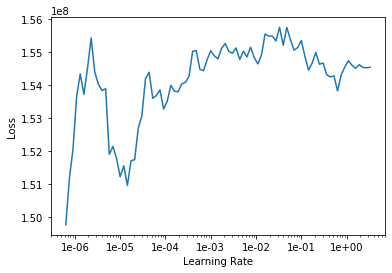

In [83]:
learn.recorder.plot()

In [86]:
learn.fit_one_cycle(5, 1e-01, wd=0.3)


epoch,train_loss,valid_loss,root_mean_squared_error,time
0,154719072.000000,302811680.000000,17394.394531,00:45
1,154539728.000000,302812096.000000,17394.406250,00:53
2,154441696.000000,302811904.000000,17394.398438,00:46
3,154556768.000000,302811776.000000,17394.394531,00:46
4,154713648.000000,302811712.000000,17394.392578,7:52:36
